<a href="https://colab.research.google.com/github/Viniciusp67/Algoritmos-de-Classifica-o-Agrupamento-e-Associa-o/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
X,y = load_iris(return_X_y=True, as_frame=True)

In [ ]:
X = X.loc[:,['petal length (cm)','petal width (cm)']]

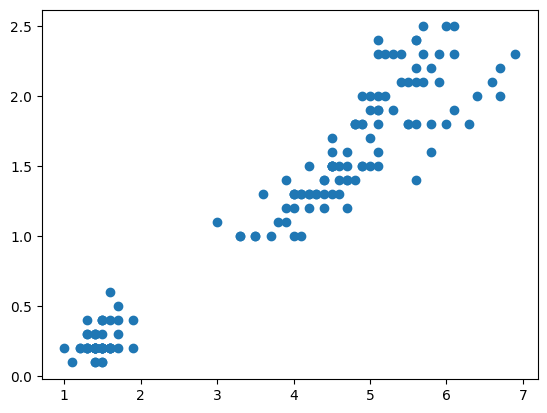

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'])

plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

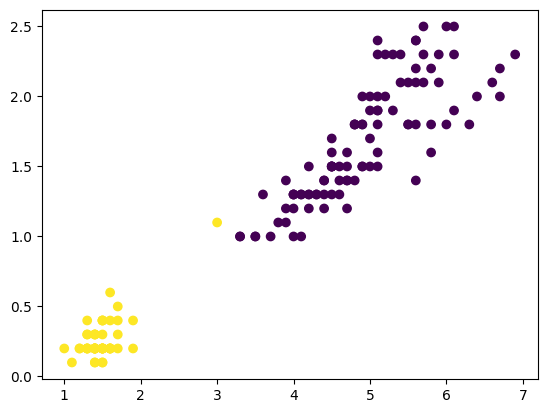

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans2.labels_)

plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)

In [ ]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)

In [ ]:
kmeans3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

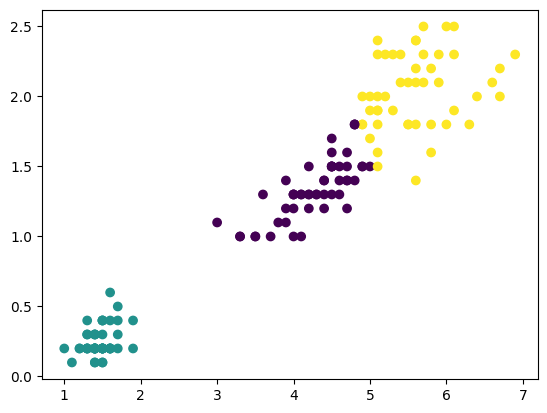

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans3.labels_)

plt.show()

In [ ]:
valores_k = []
inercias = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  inercias.append(kmeans.inertia_)

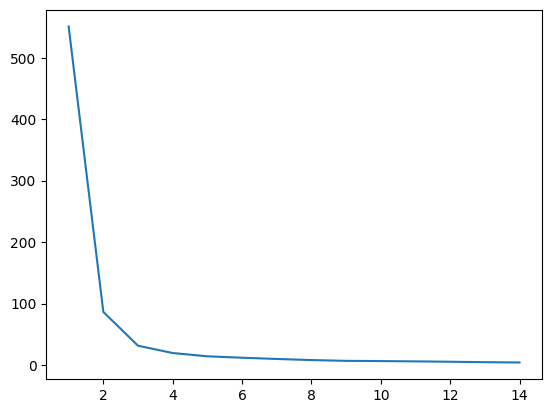

In [ ]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

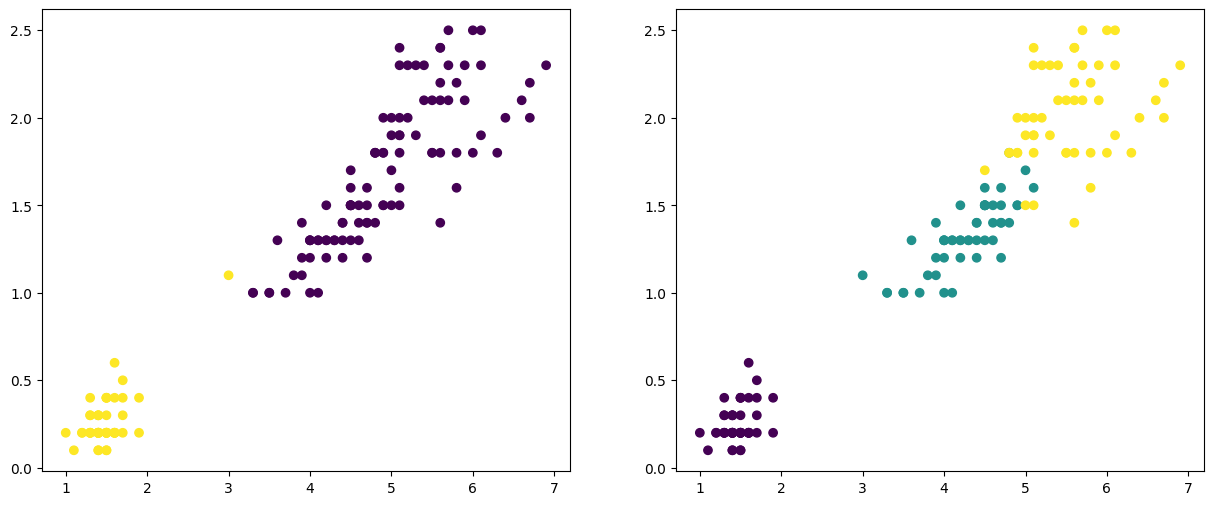

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(15,6))

ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans2.labels_)
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)


plt.show()


In [ ]:
from sklearn import metrics
metrics.adjusted_rand_score(y,kmeans2.labels_)

0.5583714437541352

In [ ]:
metrics.adjusted_rand_score(y,kmeans3.labels_)

0.8856970310281228

In [ ]:
metrics.adjusted_rand_score(y,kmeans4.labels_)

0.6799548800041489

In [ ]:
valores_k = []
adjusted = []
RI = []

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  RI.append(metrics.rand_score(y,kmeans.labels_))
  adjusted.append(metrics.adjusted_rand_score(y,kmeans.labels_))

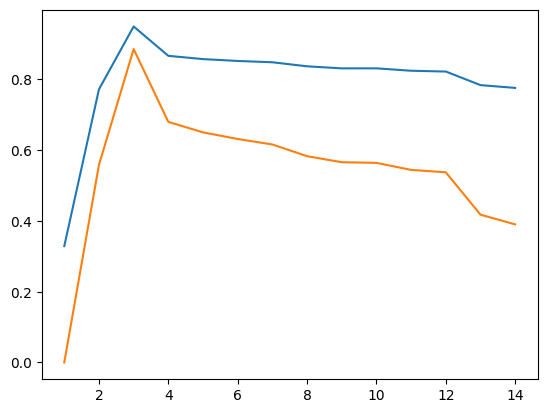

In [ ]:
fig, ax = plt.subplots()

ax.plot(valores_k,RI)
ax.plot(valores_k,adjusted)

plt.show()

In [ ]:
metrics.silhouette_score(X, kmeans2.labels_)

np.float64(0.7653904101258123)

In [ ]:
metrics.silhouette_score(X, kmeans3.labels_)

np.float64(0.6604800083974887)

In [ ]:
valores_k = []
Silhouette = []

for i in range(2,15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  valores_k.append(i)
  Silhouette.append(metrics.silhouette_score(X,kmeans.labels_))

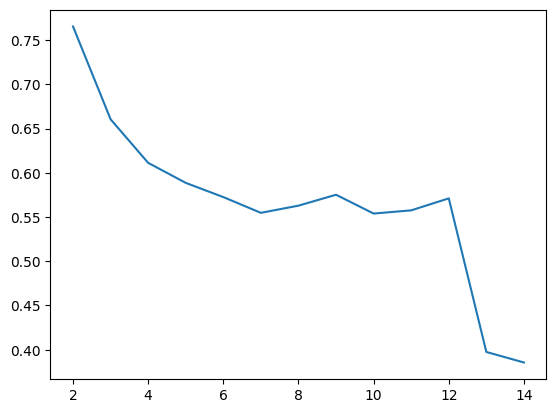

In [ ]:
fig, ax = plt.subplots()

ax.plot(valores_k,Silhouette)

plt.show()